In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inputs = np.load("Input_Class_AllClasses_Sep.npy")
gtars = np.load("Target_Class_3Classes_Sep.npy")
ctars = np.load("Pred_Class_AllClasses_Sep.npy")

In [17]:
a = np.where(gtars != ctars)

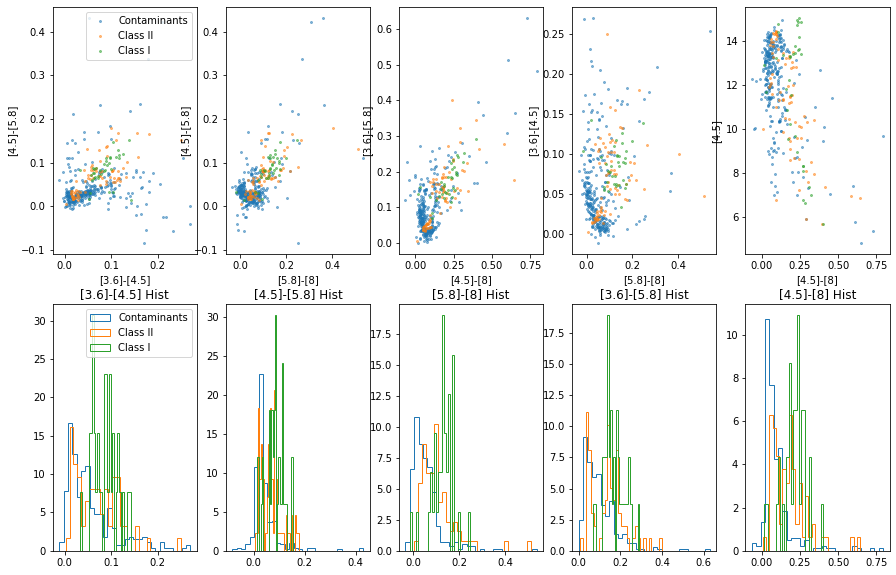

In [24]:
# Το see how this data can be separated, we can plot diagrams of the changes between the bands. 
# Because different classes have different amount of envelope material, they will stand out more in different bands.


#Difference between bands is computed as a logarithm - this gives "colour"
def magdif(lowerband,upperband):
  return 2.5*np.log10(lowerband/upperband)


# Plot each class for the difference between each consecutive band ([3.6]-[4.5] vs [4.5]-[5.8], [4.5]-[5.8] vs [5.8]-[8])
# Define the different classes; defined backwards due to how we want to plot them
classes = ["Contaminants", "Class II", "Class I"] 

# Create plot to hold the different colour-colour diagrams
fig,axs = plt.subplots(2,5,figsize=(15,10))

#iterate over and collect vals for [3.6]-[4.5], [4.5]-[5.8], and [5.8]-[8])
for it,cl in enumerate(classes):
  if it ==0: #Want to have Class I most visible, so others needs to be plotted first, corresponds to a target value of 2
    i=2
  elif it ==2: # it==2 means we're in Class I category, corresponds to target value of 0
    i=0
  elif it==1: # it==1 means we're in Class II category, corresponds to target value of 1
    i=1
  #Define variables to hold the data for each colour difference
  Band1 = []#[3.6]-[4.5]
  Band2 = []#[4.5]-[5.8]
  Band3 = []#[5.8]-[8]
  Band4 = []#[3.6]-[5.8]
  Band5 = []#[4.5]-[8]
  Mag45 =[]#[4.5] on it's own
  for index in a[0]: #iterate through the target series
    if gtars[index] == i: # Check that the class of the particular target value is the same as the class being iterated through
      Band1.append(magdif(inputs[index][0],inputs[index][2]))#[3.6]-[4.5]
      Band2.append(magdif(inputs[index][2],inputs[index][4]))#[4.5]-[5.8]
      Band3.append(magdif(inputs[index][4],inputs[index][6]))#[5.8]-[8]
      Band4.append(magdif(inputs[index][0],inputs[index][4]))#[3.6]-[5.8]
      Band5.append(magdif(inputs[index][2],inputs[index][6]))#[4.5]-[8]
      Mag45.append(inputs[index][2]) #[4.5]
  axs[0][0].plot(Band1,Band2,'.',markersize='4',alpha=0.5,label=cl)#[3.6]-[4.5] vs [4.5]-[5.8]
  axs[0][1].plot(Band3,Band2,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [4.5]-[5.8]
  axs[0][2].plot(Band5,Band4,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [3.6]-[5.8]
  axs[0][3].plot(Band3,Band1,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [3.6]-[4.5]
  axs[0][4].plot(Band5,Mag45,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [4.5]
  axs[1][0].hist(Band1,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[4.5] (each class normalized 1 under the curve)
  axs[1][1].hist(Band2,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[5.8] (each class normalized 1 under the curve)
  axs[1][2].hist(Band3,bins=30,density=True,histtype='step',label=cl) # Histogram of [5.8]-[8] (each class normalized 1 under the curve)
  axs[1][3].hist(Band4,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[5.8] (each class normalized 1 under the curve)
  axs[1][4].hist(Band5,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[8] (each class normalized 1 under the curve)

# Set axes labels
axs[0][0].set_xlabel('[3.6]-[4.5]')
axs[0][0].set_ylabel('[4.5]-[5.8]')
axs[0][1].set_xlabel('[5.8]-[8]')
axs[0][1].set_ylabel('[4.5]-[5.8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[0][3].set_ylabel('[3.6]-[4.5]')
axs[0][3].set_xlabel('[5.8]-[8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[1][0].set_title('[3.6]-[4.5] Hist')
axs[1][1].set_title('[4.5]-[5.8] Hist')
axs[1][2].set_title('[5.8]-[8] Hist')
axs[1][3].set_title('[3.6]-[5.8] Hist')
axs[1][4].set_title('[4.5]-[8] Hist')
axs[0][4].set_xlabel('[4.5]-[8]')
axs[0][4].set_ylabel('[4.5]')
axs[0][0].legend()
axs[1][0].legend()

/Users/breannacrompvoets/opt/anaconda3/envs/SF/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/breannacrompvoets/opt/anaconda3/envs/SF/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/breannacrompvoets/opt/anaconda3/envs/SF/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/breannacrompvoets/opt/anaconda3/envs/SF/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/breannacrompvoets/opt/anaconda3/envs/SF/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/breannacrompvoets/opt/a

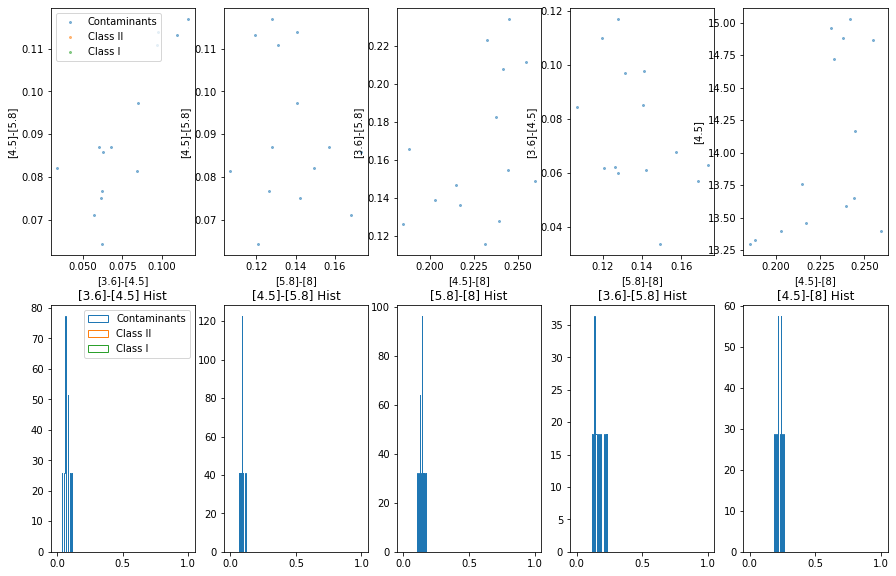

In [29]:
# Το see how this data can be separated, we can plot diagrams of the changes between the bands. 
# Because different classes have different amount of envelope material, they will stand out more in different bands.


#Difference between bands is computed as a logarithm - this gives "colour"
def magdif(lowerband,upperband):
  return 2.5*np.log10(lowerband/upperband)


# Plot each class for the difference between each consecutive band ([3.6]-[4.5] vs [4.5]-[5.8], [4.5]-[5.8] vs [5.8]-[8])
# Define the different classes; defined backwards due to how we want to plot them
classes = ["Contaminants", "Class II", "Class I"] 

# Create plot to hold the different colour-colour diagrams
fig,axs = plt.subplots(2,5,figsize=(15,10))

#iterate over and collect vals for [3.6]-[4.5], [4.5]-[5.8], and [5.8]-[8])
for it,cl in enumerate(classes):
  if it ==0: #Want to have Class I most visible, so others needs to be plotted first, corresponds to a target value of 2
    i=2
  elif it ==2: # it==2 means we're in Class I category, corresponds to target value of 0
    i=0
  elif it==1: # it==1 means we're in Class II category, corresponds to target value of 1
    i=1
  #Define variables to hold the data for each colour difference
  Band1 = []#[3.6]-[4.5]
  Band2 = []#[4.5]-[5.8]
  Band3 = []#[5.8]-[8]
  Band4 = []#[3.6]-[5.8]
  Band5 = []#[4.5]-[8]
  Mag45 =[]#[4.5] on it's own
  for index in a[0]: #iterate through the target series
    if ctars[index] == i and gtars[index] == i-2: # Check that the class of the particular target value is the same as the class being iterated through
      Band1.append(magdif(inputs[index][0],inputs[index][2]))#[3.6]-[4.5]
      Band2.append(magdif(inputs[index][2],inputs[index][4]))#[4.5]-[5.8]
      Band3.append(magdif(inputs[index][4],inputs[index][6]))#[5.8]-[8]
      Band4.append(magdif(inputs[index][0],inputs[index][4]))#[3.6]-[5.8]
      Band5.append(magdif(inputs[index][2],inputs[index][6]))#[4.5]-[8]
      Mag45.append(inputs[index][2]) #[4.5]
  axs[0][0].plot(Band1,Band2,'.',markersize='4',alpha=0.5,label=cl)#[3.6]-[4.5] vs [4.5]-[5.8]
  axs[0][1].plot(Band3,Band2,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [4.5]-[5.8]
  axs[0][2].plot(Band5,Band4,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [3.6]-[5.8]
  axs[0][3].plot(Band3,Band1,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [3.6]-[4.5]
  axs[0][4].plot(Band5,Mag45,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [4.5]
  axs[1][0].hist(Band1,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[4.5] (each class normalized 1 under the curve)
  axs[1][1].hist(Band2,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[5.8] (each class normalized 1 under the curve)
  axs[1][2].hist(Band3,bins=30,density=True,histtype='step',label=cl) # Histogram of [5.8]-[8] (each class normalized 1 under the curve)
  axs[1][3].hist(Band4,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[5.8] (each class normalized 1 under the curve)
  axs[1][4].hist(Band5,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[8] (each class normalized 1 under the curve)

# Set axes labels
axs[0][0].set_xlabel('[3.6]-[4.5]')
axs[0][0].set_ylabel('[4.5]-[5.8]')
axs[0][1].set_xlabel('[5.8]-[8]')
axs[0][1].set_ylabel('[4.5]-[5.8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[0][3].set_ylabel('[3.6]-[4.5]')
axs[0][3].set_xlabel('[5.8]-[8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[1][0].set_title('[3.6]-[4.5] Hist')
axs[1][1].set_title('[4.5]-[5.8] Hist')
axs[1][2].set_title('[5.8]-[8] Hist')
axs[1][3].set_title('[3.6]-[5.8] Hist')
axs[1][4].set_title('[4.5]-[8] Hist')
axs[0][4].set_xlabel('[4.5]-[8]')
axs[0][4].set_ylabel('[4.5]')
axs[0][0].legend()
axs[1][0].legend()

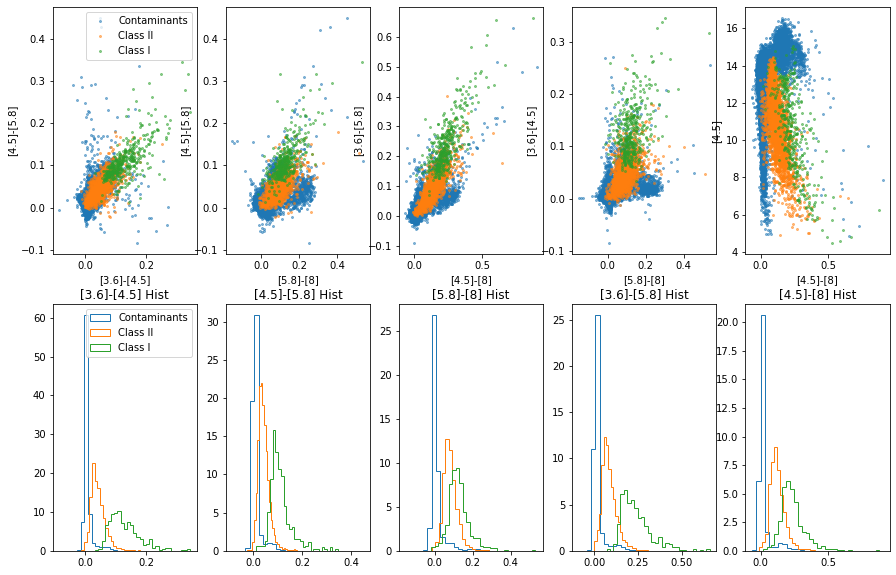

In [22]:
# Το see how this data can be separated, we can plot diagrams of the changes between the bands. 
# Because different classes have different amount of envelope material, they will stand out more in different bands.


#Difference between bands is computed as a logarithm - this gives "colour"
def magdif(lowerband,upperband):
  return 2.5*np.log10(lowerband/upperband)


# Plot each class for the difference between each consecutive band ([3.6]-[4.5] vs [4.5]-[5.8], [4.5]-[5.8] vs [5.8]-[8])
# Define the different classes; defined backwards due to how we want to plot them
classes = ["Contaminants", "Class II", "Class I"] 

# Create plot to hold the different colour-colour diagrams
fig,axs = plt.subplots(2,5,figsize=(15,10))

#iterate over and collect vals for [3.6]-[4.5], [4.5]-[5.8], and [5.8]-[8])
for it,cl in enumerate(classes):
  if it ==0: #Want to have Class I most visible, so others needs to be plotted first, corresponds to a target value of 2
    i=2
  elif it ==2: # it==2 means we're in Class I category, corresponds to target value of 0
    i=0
  elif it==1: # it==1 means we're in Class II category, corresponds to target value of 1
    i=1
  #Define variables to hold the data for each colour difference
  Band1 = []#[3.6]-[4.5]
  Band2 = []#[4.5]-[5.8]
  Band3 = []#[5.8]-[8]
  Band4 = []#[3.6]-[5.8]
  Band5 = []#[4.5]-[8]
  Mag45 =[]#[4.5] on it's own
  for index, tar in enumerate(gtars): #iterate through the target series
    if tar == i: # Check that the class of the particular target value is the same as the class being iterated through
      Band1.append(magdif(inputs[index][0],inputs[index][2]))#[3.6]-[4.5]
      Band2.append(magdif(inputs[index][2],inputs[index][4]))#[4.5]-[5.8]
      Band3.append(magdif(inputs[index][4],inputs[index][6]))#[5.8]-[8]
      Band4.append(magdif(inputs[index][0],inputs[index][4]))#[3.6]-[5.8]
      Band5.append(magdif(inputs[index][2],inputs[index][6]))#[4.5]-[8]
      Mag45.append(inputs[index][2]) #[4.5]
  axs[0][0].plot(Band1,Band2,'.',markersize='4',alpha=0.5,label=cl)#[3.6]-[4.5] vs [4.5]-[5.8]
  axs[0][1].plot(Band3,Band2,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [4.5]-[5.8]
  axs[0][2].plot(Band5,Band4,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [3.6]-[5.8]
  axs[0][3].plot(Band3,Band1,'.',markersize='4',alpha=0.5,label=cl)#[5.8]-[8] vs [3.6]-[4.5]
  axs[0][4].plot(Band5,Mag45,'.',markersize='4',alpha=0.5,label=cl)#[4.5]-[8] vs [4.5]
  axs[1][0].hist(Band1,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[4.5] (each class normalized 1 under the curve)
  axs[1][1].hist(Band2,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[5.8] (each class normalized 1 under the curve)
  axs[1][2].hist(Band3,bins=30,density=True,histtype='step',label=cl) # Histogram of [5.8]-[8] (each class normalized 1 under the curve)
  axs[1][3].hist(Band4,bins=30,density=True,histtype='step',label=cl) # Histogram of [3.6]-[5.8] (each class normalized 1 under the curve)
  axs[1][4].hist(Band5,bins=30,density=True,histtype='step',label=cl) # Histogram of [4.5]-[8] (each class normalized 1 under the curve)

# Set axes labels
axs[0][0].set_xlabel('[3.6]-[4.5]')
axs[0][0].set_ylabel('[4.5]-[5.8]')
axs[0][1].set_xlabel('[5.8]-[8]')
axs[0][1].set_ylabel('[4.5]-[5.8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[0][3].set_ylabel('[3.6]-[4.5]')
axs[0][3].set_xlabel('[5.8]-[8]')
axs[0][2].set_ylabel('[3.6]-[5.8]')
axs[0][2].set_xlabel('[4.5]-[8]')
axs[1][0].set_title('[3.6]-[4.5] Hist')
axs[1][1].set_title('[4.5]-[5.8] Hist')
axs[1][2].set_title('[5.8]-[8] Hist')
axs[1][3].set_title('[3.6]-[5.8] Hist')
axs[1][4].set_title('[4.5]-[8] Hist')
axs[0][4].set_xlabel('[4.5]-[8]')
axs[0][4].set_ylabel('[4.5]')
axs[0][0].legend()
axs[1][0].legend()